In [1]:
import Pkg 
Pkg.status()
using ForwardDiff
using LinearAlgebra
using Plots
using Random




      Status `~/.julia/environments/v1.6/Project.toml`
  [f6369f11] ForwardDiff v0.10.35
  [7073ff75] IJulia v1.24.0
  [91a5bcdd] Plots v1.38.17
  [d330b81b] PyPlot v2.11.1
  [37e2e46d] LinearAlgebra


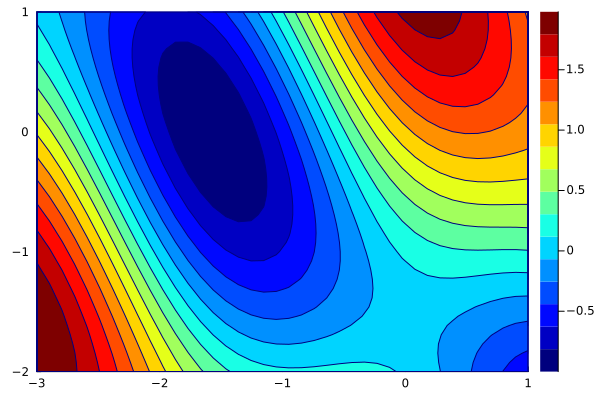

In [2]:
#visualisation of gradients
g(x) = [cos(x[1] + x[2]) - 2*cos(x[1])*sin(x[1]); cos(x[1] + x[2])]
f(x)=sin(x[1]+x[2])+cos(x[1])^2
#f(x1,x2)=sin(x1+x2)+cos(x1)^2


f(x1,x2)=f([x1,x2])

xs=range(-3,1,length=40)
ys=range(-2,1,length=40)

contourf(xs,ys,f,color=:jet)

In [3]:
finite_difference(f, x::Real, h=1e-8) = (f(x+h) - f(x)) / h

x = [-2; -1]
fin_diff(h) = finite_difference(y -> f(x[1], y), x[2], h=h)

fin_diff (generic function with 1 method)

In [4]:
true_grad=g([-2,-1])[2]

-0.9899924966004454

In [5]:
hs = 10. .^ (-15:0.01:-1)

plot(hs, fin_diff,
    xlabel = "h",
    ylabel = "Partial gradient wrt y",
    label = "Approximation",
    xscale = :log10,
)
hline!([true_grad]; label =  "True gradient")



LoadError: MethodError: no method matching finite_difference(::var"#1#2", ::Int64; h=1.0e-15)
[0mClosest candidates are:
[0m  finite_difference(::Any, ::Real) at In[3]:1[91m got unsupported keyword argument "h"[39m
[0m  finite_difference(::Any, ::Real, [91m::Any[39m) at In[3]:1[91m got unsupported keyword argument "h"[39m

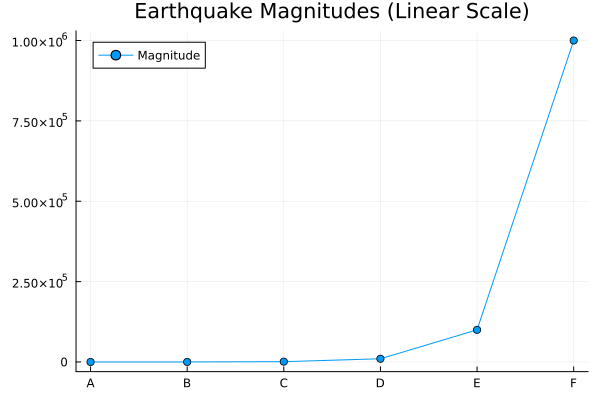

In [6]:
using Plots

# Data
locations = ["A", "B", "C", "D", "E", "F"]
magnitudes = [10.0, 100, 1000, 10000, 100000, 1000000]

plot(locations, magnitudes, label="Magnitude", marker=:circle, legend=:topleft, title="Earthquake Magnitudes (Linear Scale)")


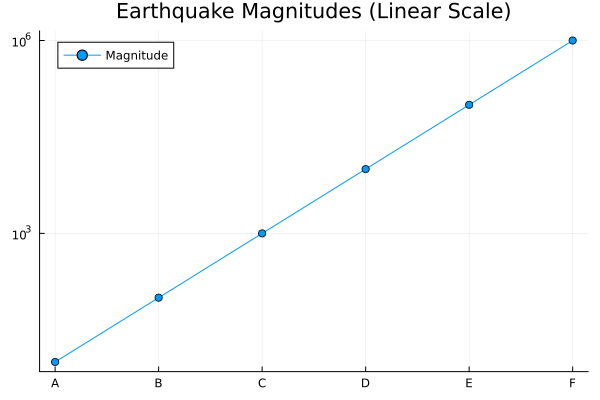

In [7]:
plot(locations, magnitudes, label="Magnitude", marker=:circle, legend=:topleft,yscale=:log10, title="Earthquake Magnitudes (Linear Scale)")


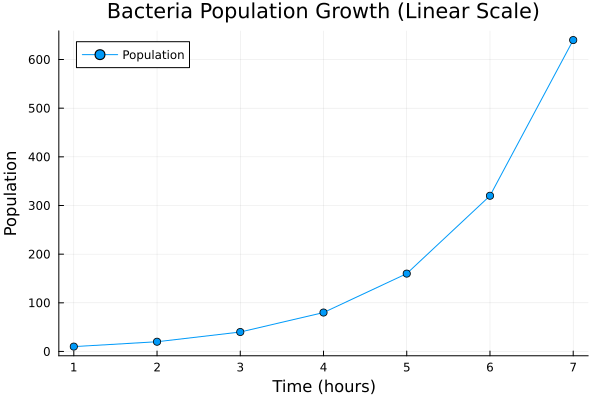

In [8]:
# Data
time_hours = [1, 2, 3, 4, 5, 6, 7]
population = [10, 20, 40, 80, 160, 320, 640]

# Plot using linear scale
plot(time_hours, population, label="Population", marker=:circle, legend=:topleft, title="Bacteria Population Growth (Linear Scale)", xlabel="Time (hours)", ylabel="Population")



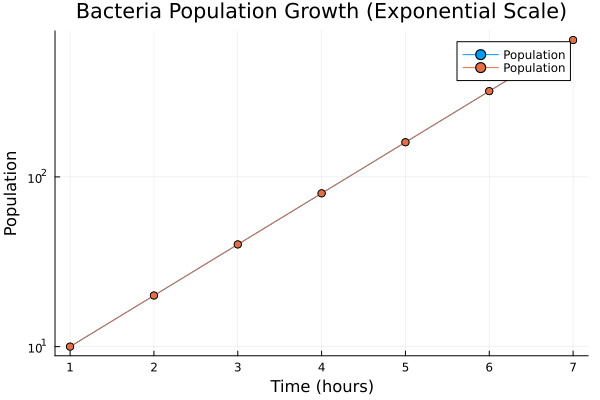

In [9]:
# Plot using exponential (logarithmic) scale on the y-axis
plot!(time_hours, population, label="Population", marker=:circle, legend=:topright, yscale=:log10, title="Bacteria Population Growth (Exponential Scale)", xlabel="Time (hours)", ylabel="Population")

In [10]:
#direction of the gradients
x=[-2,-1]
xs=range(-3,1,length=40)
ys=range(-2,1,length=40)

α=0.25
x_grad=[-2,-1]

  


2-element Vector{Int64}:
 -2
 -1

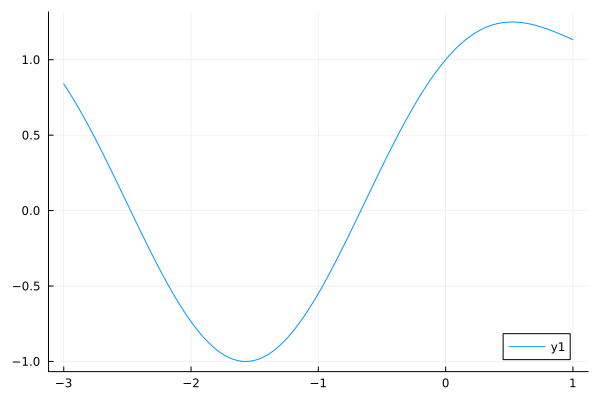

In [11]:
#find the solution of the following function by using
# using the newton method
r(x)=sin(x)+cos(x)^2
# and its gradient is 
g(x) = cos(x)-2*cos(x)*sin(x)

x = range(-3,1,length=1000)
p=plot(x,r)



In [12]:
# Gradient descent
function optim(f,g,x0,step;max_itera=100)
    max_itera=100
    xout=zeros(length(x0),max_itera+1)
    xout[:,1]=x0
    
    for i in 1:max_itera
        xout[:,i+1]=xout[:,i]-step*g(xout[:,i])
    end
    
    return xout
end




optim (generic function with 1 method)

In [13]:


function create_anim(
    f,
    path,
    xlims,
    ylims,
    file_name = joinpath(pwd(), randstring(12) * ".gif");
    xbounds = xlims,
    ybounds = ylims,
    fps = 15,
)
    xs = range(xlims...; length = 100)
    ys = range(ylims...; length = 100)
    plt = contourf(xs, ys, f; color = :jet)

    # add constraints if provided
    if !(xbounds == xlims && ybounds == ylims)
        x_rect = [xbounds[1]; xbounds[2]; xbounds[2]; xbounds[1]; xbounds[1]]
        y_rect = [ybounds[1]; ybounds[1]; ybounds[2]; ybounds[2]; ybounds[1]]

        plot!(x_rect, y_rect; line = (2, :dash, :red), label="")
    end

    # add an empty plot
    plot!(Float64[], Float64[]; line = (4, :arrow, :black), label = "")

    # extract the last plot series
    plt_path = plt.series_list[end]

    # create the animation and save it
    anim = Animation()
    for x in eachcol(path)
        push!(plt_path, x[1], x[2]) # add a new point
        frame(anim)
    end
    gif(anim, file_name; fps = fps, show_msg = false)
    return nothing
end

create_anim (generic function with 2 methods)

In [14]:
f(x)=sin(x[1]+x[2])+cos(x[1])^2
g(x) = [cos(x[1] + x[2]) - 2*cos(x[1])*sin(x[1]); cos(x[1] + x[2])]
x0=[0,-1]
step=0.1

f(x1,x2)=f([x1,x2])

xout=optim(f,g,x0,0.1)
xlims = (-3, 1)
ylims = (-2, 1)

create_anim(f, xout, xlims, ylims, "anim1.gif")


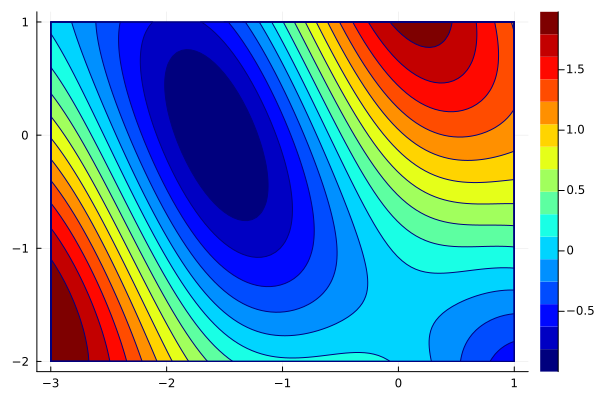

In [15]:
f(x)=sin(x[1]+x[2])+cos(x[1])^2
f(x1,x2)=f([x1,x2])
g(x) = [cos(x[1] + x[2]) - 2*cos(x[1])*sin(x[1]); cos(x[1] + x[2])]

xlims = (-3, 1)
ylims = (-2, 1)
xs=range(xlims...; length=100)
ys=range(ylims...; length=100)

plt=contourf(xs,ys,f;color=:jet)
plt_path = plt.series_list[end]

x_gd = optim([], g, [0; 0], 0.1)

xbounds=(-3,1)
ybounds=(-2,1)
# add constraints if provided
if !(xbounds == xlims && ybounds == ylims)
        x_rect = [xbounds[1]; xbounds[2]; xbounds[2]; xbounds[1]; xbounds[1]]
        y_rect = [ybounds[1]; ybounds[1]; ybounds[2]; ybounds[2]; ybounds[1]]

        plot!(x_rect, y_rect; line = (2, :dash, :red), label="")
end
# add an empty plot
plot!(Float64[], Float64[]; line = (4, :arrow, :black), label = "")





In [16]:
x_gd = optim([], g, [0; 0], 0.01)
create_anim(f, x_gd, xlims, ylims, "anim2.gif")

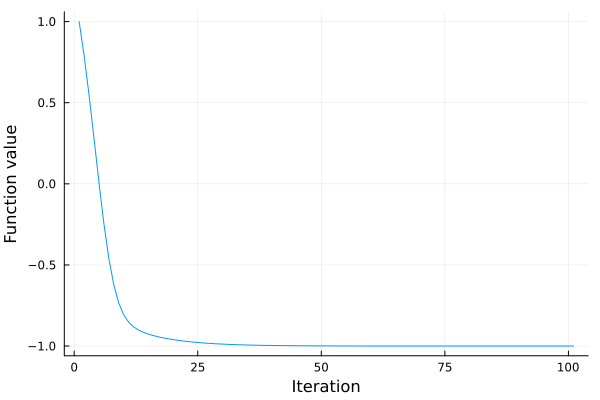

In [17]:
x_gd = optim([], g, [0; 0], 0.1)
create_anim(f, x_gd, xlims, ylims, "anim3.gif")
f_gd = [f(x) for x in eachcol(x_gd)]

plot(f_gd, label="", xlabel="Iteration", ylabel="Function value")

In [73]:
f(x)=sin(x[1]+x[2])+cos(x[1])^2
f(x1,x2)=f([x1,x2])
g(x) = [cos(x[1] + x[2]) - 2*cos(x[1])*sin(x[1]); cos(x[1] + x[2])]

g (generic function with 1 method)

In [84]:
# adaptive step sizing
# to avoid the overshoot or bangbang nature, we can usen armijo condition
# Gradient descent
function optim_with_overshootcheck(f,g,x0,step;max_itera=100)
    max_itera=100
    xout=zeros(length(x0),max_itera+1)
    xout[:,1]=x0
    for i in 1:max_itera
        xout[:,i+1]=xout[:,i]-step*g(xout[:,i])
        while !(f(xout[:,i+1]) < f(xout[:,i]))
                    step=0.5*step
                    xout[:,i+1]=xout[:,i]-step*g(xout[:,i])
                    break
        end
    end
    
    return xout
end




optim_with_overshootcheck (generic function with 1 method)

In [85]:
x_gd = optim([], g, [0; 0], 1)
create_anim(f, x_gd, xlims, ylims, "anim_without_armijo.gif")


In [86]:
x_gd_armijo=optim_with_overshootcheck(f, g, [0; 0], 1)
create_anim(f, x_gd_armijo, xlims, ylims, "anim_with_overshootcheck.gif")
